In [7]:
!pip install -U gdown
!gdown --id 1TCLhj4PSmMl_WMS1x0gfXvov2uuxgNfw


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1TCLhj4PSmMl_WMS1x0gfXvov2uuxgNfw
From (redirected): https://drive.google.com/uc?id=1TCLhj4PSmMl_WMS1x0gfXvov2uuxgNfw&confirm=t&uuid=0213304c-7bdf-4f43-bc45-756de49b35e5
To: /content/waste-classification.zip
100% 448M/448M [00:04<00:00, 101MB/s]


In [8]:
import zipfile
with zipfile.ZipFile("waste-classification.zip", 'r') as zip_ref:
    zip_ref.extractall("waste_dataset")

In [9]:
import os
os.listdir("waste_dataset")

['dataset', 'DATASET']

In [12]:
# Define training and validation directories
train_dir = "/content/waste_dataset/DATASET/TRAIN"
val_dir = "/content/waste_dataset/DATASET/TEST"


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [16]:
# Build a simple CNN model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=5, validation_data=val_data)


Epoch 1/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 734s 1s/step - accuracy: 0.7678 - loss: 0.5171 - val_accuracy: 0.8615 - val_loss: 0.3580
Epoch 2/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 721s 1s/step - accuracy: 0.8472 - loss: 0.3608 - val_accuracy: 0.8739 - val_loss: 0.3286
Epoch 3/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 740s 1s/step - accuracy: 0.8600 - loss: 0.3359 - val_accuracy: 0.9081 - val_loss: 0.2522
Epoch 4/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 734s 1s/step - accuracy: 0.8791 - loss: 0.2934 - val_accuracy: 0.8766 - val_loss: 0.3207
Epoch 5/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 733s 1s/step - accuracy: 0.8942 - loss: 0.2598 - val_accuracy: 0.9144 - val_loss: 0.2521


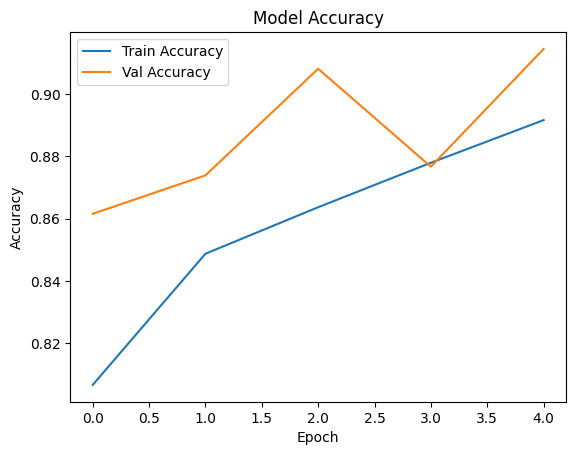

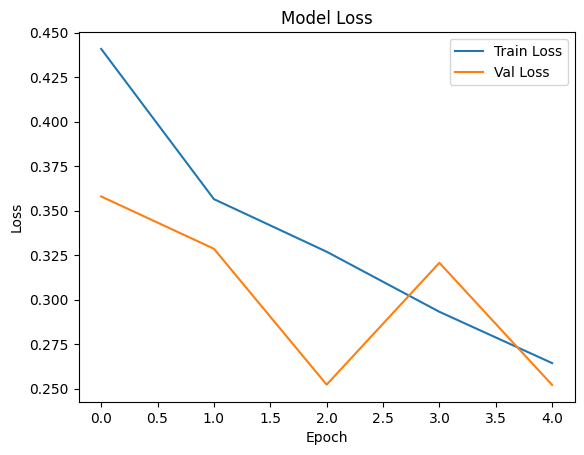

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [19]:
# Save trained model to file
model.save("recyclenet_model.keras")


In [20]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("recyclenet_model.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp12egw367'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor_10')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  138480079485648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138480079483536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138480079484112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138480079482000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138480079483920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138480079482768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138480079482192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138480079480848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138480079482960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138480079481616: TensorSpec(shape=(), dtype=tf.resource, name=None)
